In [1]:
import pandas as pd
import os 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from matplotlib import interactive
interactive(True)

In [44]:
df = pd.read_csv('heart.csv')
df.head(10)

,Unnamed: 0,Subject,Condition,Response,Reaction_Time,Corrects
0,1,s13,sync,other,1.6502,Wrong
1,2,s13,async,mine,1.3487,Wrong
2,3,s13,async,other,1.0789,Correct
3,4,s13,sync,other,0.9516,Wrong
4,5,s13,async,mine,1.1900,Wrong
5,6,s13,async,mine,2.1579,Wrong
6,7,s13,async,other,0.9203,Correct
7,8,s13,sync,mine,1.8723,Correct
8,9,s13,sync,other,0.4437,Wrong
9,10,s13,sync,mine,1.6182,Correct


In [46]:
slowdowns = []
for num,name in enumerate(df['Corrects']):
    if df['Corrects'][num] == 'Wrong':
        slowdowns.append(float(df['Reaction_Time'][num+1])-float(df['Reaction_Time'][num]))
    else:
        slowdowns.append(name)
df['post_rt'] =   slowdowns

perceivers = []
good_perceivers = ['s2','s7','s10','s11','s14']
for num,name in enumerate(df['Corrects']):
    if df['Subject'][num] in good_perceivers: 
        perceivers.append('Good')
    else:
        perceivers.append('Bad')
df['Perceiver'] = perceivers

df.to_csv('slowdown.csv')

In [70]:
df = df[df['post_rt']!= 'Correct']
df['post_rt'] = df['post_rt'].astype(np.float) 


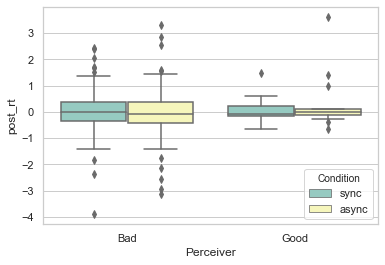

In [81]:
ax = sns.boxplot(x="Perceiver", y="post_rt",hue = 'Condition', data=df, palette="Set3")

In [85]:
df.Condition


0       sync
1      async
3       sync
4      async
5      async
       ...  
468    async
469    async
470    async
475     sync
479     sync
Name: Condition, Length: 222, dtype: object

In [55]:
import pandas as pdimport, statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

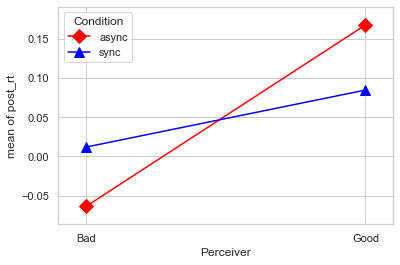

In [87]:
fig = interaction_plot(df.Perceiver, df.Condition, df.post_rt,colors=['red','blue'], markers=['D','^'], ms=10)

In [92]:
formula = 'post_rt ~ C(Perceiver) + C(Condition) + C(Response)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=3)
print(aov_table.round(4))

In [93]:

print(aov_table.round(4))

                sum_sq     df       F  PR(>F)
Intercept       0.3046    1.0  0.3501  0.5547
C(Perceiver)    1.0222    1.0  1.1747  0.2796
C(Condition)    0.1537    1.0  0.1766  0.6747
C(Response)     0.1537    1.0  0.1766  0.6747
Residual      190.5589  219.0     NaN     NaN


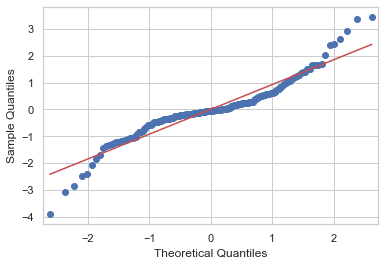

In [91]:
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()

In [ ]:
################# examine for every subject 

In [ ]:
df = pd.read_csv('heart.csv')
df.head(10)

In [53]:
row,col = df.shape
latencies = []
for num in range(row):
    print(num)
    if num == 480:
        print(0)
        latencies.append(0)
    else:
        print(float(df['Reaction_Time'][num+1])-float(df['Reaction_Time'][num]))
        latencies.append(float(df['Reaction_Time'][num+1])-float(df['Reaction_Time'][num]))
df['Latencies'] = latencies

0
-0.3014999999999999
1
-0.26980000000000004
2
-0.12729999999999997
3
0.23839999999999995
4
0.9679000000000002
5
-1.2376
6
0.9520000000000001
7
-1.4286
8
1.1745
9
-0.39890000000000003
10
-0.3466
11
0.04749999999999999
12
-0.11119999999999997
13
-0.15870000000000006
14
0.3651000000000001
15
0.15869999999999984
16
-0.0633999999999999
17
-0.22220000000000006
18
0.26969999999999994
19
0.9045000000000001
20
0.984
21
-2.1268
22
-0.09500000000000008
23
1.1268
24
-0.8725
25
-0.02639999999999998
26
-0.11649999999999994
27
-0.1269
28
0.14280000000000004
29
-0.17610000000000003
30
-0.014399999999999968
31
0.127
32
0.8096999999999999
33
-1.0002
34
0.20609999999999995
35
-0.22209999999999996
36
0.06230000000000002
37
0.6811999999999999
38
0.05049999999999999
39
-0.5575
40
0.19230000000000003
41
0.015800000000000036
42
-0.238
43
-0.11270000000000002
44
0.6682999999999999
45
-0.5715999999999999
46
-0.03160000000000007
47
0.6191
48
1.4246
49
-0.9654
50
-0.8724000000000001
51
0.7774000000000001
52
-0.4

In [54]:
df

,Unnamed: 0,Subject,Condition,Response,Reaction_Time,Corrects,Latencies
0,1,s13,sync,other,1.6502,Wrong,-0.3015
1,2,s13,async,mine,1.3487,Wrong,-0.2698
2,3,s13,async,other,1.0789,Correct,-0.1273
3,4,s13,sync,other,0.9516,Wrong,0.2384
4,5,s13,async,mine,1.1900,Wrong,0.9679
...,...,...,...,...,...,...,...
476,477,s11,async,other,0.0000,Correct,0.6188
477,478,s11,sync,mine,0.6188,Correct,-0.0635
478,479,s11,sync,mine,0.5553,Correct,0.5872
479,480,s11,sync,other,1.1425,Wrong,-0.1429


In [56]:
df = df[df['Subject'] == 's11']
df


,Unnamed: 0,Subject,Condition,Response,Reaction_Time,Corrects,Latencies
456,457,s11,sync,other,0.7174,Wrong,0.1394
457,458,s11,async,mine,0.8568,Wrong,-0.0953
458,459,s11,sync,mine,0.7615,Correct,-0.1746
459,460,s11,sync,mine,0.5869,Correct,0.0476
460,461,s11,sync,mine,0.6345,Correct,-0.0476
461,462,s11,sync,mine,0.5869,Correct,0.0318
462,463,s11,sync,mine,0.6187,Correct,0.1269
463,464,s11,async,other,0.7456,Correct,-0.0172
464,465,s11,sync,mine,0.7284,Correct,-0.0620
465,466,s11,sync,mine,0.6664,Correct,-0.0159


In [59]:
formula = 'Latencies ~ C(Corrects)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=3)
print(aov_table.round(4))

             sum_sq    df       F  PR(>F)
Intercept    0.0647   1.0  1.1875  0.2871
C(Corrects)  0.1521   1.0  2.7939  0.1082
Residual     1.2523  23.0     NaN     NaN


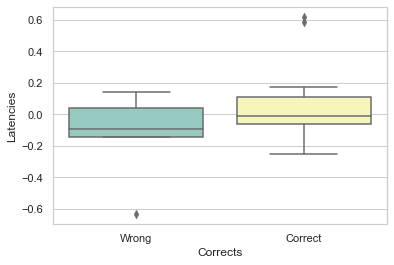

In [60]:
ax = sns.boxplot(x="Corrects", y="Latencies", data=df, palette="Set3")